In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, gs, psf

In [2]:
# set parameters
detector = 1
detector_position = (2048, 2048)
band = 'F184'
psf_oversample = 5

In [9]:
# get galsim psf
galsim_psf = psf.get_galsim_psf(band=band, detector=detector, detector_position=detector_position, pupil_bin=8)

In [4]:
# get webbpsf psf
webbpsf = psf.get_webbpsf_psf(band=band, detector=detector, detector_position=detector_position,
                              oversample=psf_oversample)

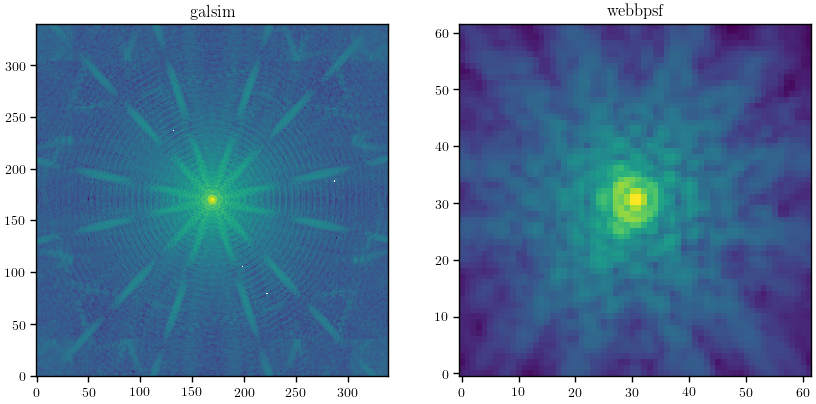

In [10]:
# compare
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(galsim_psf.drawImage().array, norm=colors.LogNorm())
ax[1].imshow(webbpsf.drawImage().array, norm=colors.LogNorm())
ax[0].set_title('galsim')
ax[1].set_title('webbpsf')
plt.show()

In [6]:
from mejiro.lenses.test import SampleStrongLens

lens = SampleStrongLens()
array = lens.get_array(num_pix=45, side=4.95, band=band)

from scipy import signal

galsim_convolved = signal.fftconvolve(array, galsim_psf.drawImage().array, mode='same')
webbpsf_convolved = signal.fftconvolve(array, webbpsf.drawImage().array, mode='same')

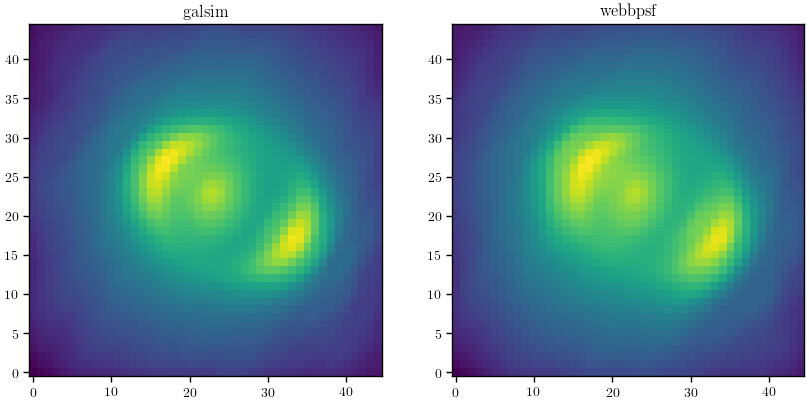

In [7]:
# compare
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(galsim_convolved, norm=colors.LogNorm())
ax[1].imshow(webbpsf_convolved, norm=colors.LogNorm())
ax[0].set_title('galsim')
ax[1].set_title('webbpsf')
plt.show()

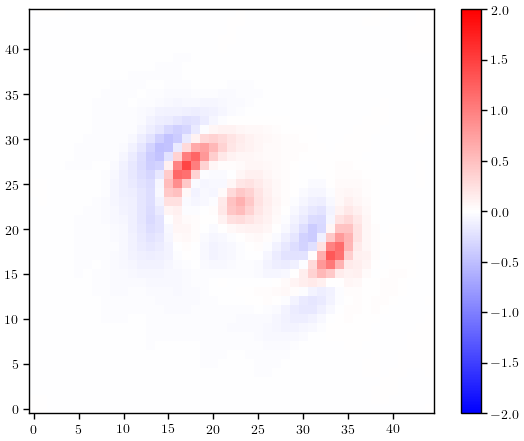

In [8]:
plt.imshow(galsim_convolved - webbpsf_convolved, cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.show()